In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_cpp", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp", 220, 53, 53)

In [25]:
dataset.get_train_files()

[]

In [26]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [27]:
dataset.get_vocabulary_map()

{'!': 0,
 '!=': 1,
 '#++': 2,
 '#--': 3,
 '%': 4,
 '%=': 5,
 '&': 6,
 '&#': 7,
 '&&': 8,
 '&=': 9,
 '*': 10,
 '*#': 11,
 '*=': 12,
 '+': 13,
 '+#': 14,
 '++#': 15,
 '+=': 16,
 '-': 17,
 '-#': 18,
 '--#': 19,
 '-=': 20,
 '/': 21,
 '/=': 22,
 '<': 23,
 '<<': 24,
 '<<=': 25,
 '<=': 26,
 '=': 27,
 '==': 28,
 '>': 29,
 '>=': 30,
 '>>': 31,
 '>>=': 32,
 'CPPASTAliasDeclaration': 33,
 'CPPASTArrayDeclarator': 34,
 'CPPASTArrayModifier': 35,
 'CPPASTArraySubscriptExpression': 36,
 'CPPASTBaseSpecifier': 37,
 'CPPASTBinaryExpression': 38,
 'CPPASTBreakStatement': 39,
 'CPPASTCapture': 40,
 'CPPASTCaseStatement': 41,
 'CPPASTCastExpression': 42,
 'CPPASTCatchHandler': 43,
 'CPPASTCompositeTypeSpecifier': 44,
 'CPPASTCompoundStatement': 45,
 'CPPASTConditionalExpression': 46,
 'CPPASTConstructorChainInitializer': 47,
 'CPPASTConstructorInitializer': 48,
 'CPPASTContinueStatement': 49,
 'CPPASTConversionName': 50,
 'CPPASTDeclarationStatement': 51,
 'CPPASTDeclarator': 52,
 'CPPASTDefaultStatement

In [28]:
from vectorizer.AstNode2VecDataset2 import AstNode2VecDataset2

embedding_dataset = AstNode2VecDataset2(dataset.get_train_files())

In [29]:
embedding_dataset.create()

In [21]:
bin_parent = []
unary_parent = []
logical_and_parent_context = []
logical_and_child_context = []
logical_pp_parent_context = []
logical_pp_child_context = []
for sample in embedding_dataset.get_samples():
    if sample["target"] == "CPPASTBinaryExpression":
        if "&&" in sample["context"]:
            bin_parent.append(sample["parent_context"])
    if sample["target"] == "CPPASTUnaryExpression":
        if "--" in sample["context"]:
            unary_parent.append(sample["parent_context"])
    if sample["target"] == "&&":
        logical_and_parent_context.append(sample["parent_context"])
        logical_and_parent_context.extend(sample["context"])
    if sample["target"] == "++":
        logical_pp_parent_context.append(sample["parent_context"])
        logical_pp_parent_context.extend(sample["context"])



In [22]:
from collections import Counter
Counter(bin_parent)


Counter({'CPPASTIfStatement': 5094,
         'CPPASTBinaryExpression': 1691,
         'CPPASTUnaryExpression': 834,
         'CPPASTExpressionStatement': 4,
         'CPPASTWhileStatement': 248,
         'CPPASTForStatement': 145,
         'CPPASTReturnStatement': 159,
         'CPPASTEqualsInitializer': 27,
         'CPPASTConditionalExpression': 49,
         'CPPASTDoStatement': 16,
         'CPPASTFunctionCallExpression': 13,
         'CPPASTExpressionList': 9,
         'CPPASTTemplateId': 4})

In [23]:
Counter(unary_parent)

Counter({'CPPASTExpressionStatement': 1220,
         'CPPASTForStatement': 704,
         'CPPASTWhileStatement': 528,
         'CPPASTExpressionList': 101,
         'CPPASTArraySubscriptExpression': 48,
         'CPPASTFunctionCallExpression': 3,
         'CPPASTUnaryExpression': 15,
         'CPPASTConditionalExpression': 9,
         'CPPASTConstructorInitializer': 4,
         'CPPASTBinaryExpression': 32})

In [9]:
Counter(logical_pp_parent_context)

Counter({'CPPASTUnaryExpression': 41763})

In [10]:
Counter(logical_pp_child_context)

Counter()

In [30]:
node_map = dict([(y, x+1) for x, y in enumerate(sorted(embedding_dataset.get_vocabulary()))])

In [31]:
node_map

{'!': 1,
 '!=': 2,
 '#++': 3,
 '#--': 4,
 '%': 5,
 '%=': 6,
 '&': 7,
 '&#': 8,
 '&&': 9,
 '&=': 10,
 '*': 11,
 '*#': 12,
 '*=': 13,
 '+': 14,
 '+#': 15,
 '++#': 16,
 '+=': 17,
 '-': 18,
 '-#': 19,
 '--#': 20,
 '-=': 21,
 '/': 22,
 '/=': 23,
 '<': 24,
 '<<': 25,
 '<<=': 26,
 '<=': 27,
 '=': 28,
 '==': 29,
 '>': 30,
 '>=': 31,
 '>>': 32,
 '>>=': 33,
 'CPPASTAliasDeclaration': 34,
 'CPPASTArrayDeclarator': 35,
 'CPPASTArrayModifier': 36,
 'CPPASTArraySubscriptExpression': 37,
 'CPPASTBaseSpecifier': 38,
 'CPPASTBinaryExpression': 39,
 'CPPASTBreakStatement': 40,
 'CPPASTCapture': 41,
 'CPPASTCaseStatement': 42,
 'CPPASTCastExpression': 43,
 'CPPASTCatchHandler': 44,
 'CPPASTCompositeTypeSpecifier': 45,
 'CPPASTCompoundStatement': 46,
 'CPPASTConditionalExpression': 47,
 'CPPASTConstructorChainInitializer': 48,
 'CPPASTConstructorInitializer': 49,
 'CPPASTContinueStatement': 50,
 'CPPASTConversionName': 51,
 'CPPASTDeclarationStatement': 52,
 'CPPASTDeclarator': 53,
 'CPPASTDefaultStatemen

In [37]:
[1.0 if j == 121-1 else 0.0 for j in range(len(node_map))]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [32]:
embedding_dataset.get_samples()[1]

{'target': 'CPPASTUsingDirective',
 'context': ['CPPASTName'],
 'parent_context': 'CPPASTTranslationUnit'}

In [38]:
vocabulary = embedding_dataset.get_vocabulary()
vocabulary

{'!',
 '!=',
 '#++',
 '#--',
 '%',
 '%=',
 '&',
 '&#',
 '&&',
 '&=',
 '*',
 '*#',
 '*=',
 '+',
 '+#',
 '++#',
 '+=',
 '-',
 '-#',
 '--#',
 '-=',
 '/',
 '/=',
 '<',
 '<<',
 '<<=',
 '<=',
 '=',
 '==',
 '>',
 '>=',
 '>>',
 '>>=',
 'CPPASTAliasDeclaration',
 'CPPASTArrayDeclarator',
 'CPPASTArrayModifier',
 'CPPASTArraySubscriptExpression',
 'CPPASTBaseSpecifier',
 'CPPASTBinaryExpression',
 'CPPASTBreakStatement',
 'CPPASTCapture',
 'CPPASTCaseStatement',
 'CPPASTCastExpression',
 'CPPASTCatchHandler',
 'CPPASTCompositeTypeSpecifier',
 'CPPASTCompoundStatement',
 'CPPASTConditionalExpression',
 'CPPASTConstructorChainInitializer',
 'CPPASTConstructorInitializer',
 'CPPASTContinueStatement',
 'CPPASTConversionName',
 'CPPASTDeclarationStatement',
 'CPPASTDeclarator',
 'CPPASTDefaultStatement',
 'CPPASTDeleteExpression',
 'CPPASTDoStatement',
 'CPPASTElaboratedTypeSpecifier',
 'CPPASTEnumerationSpecifier',
 'CPPASTEnumerator',
 'CPPASTEqualsInitializer',
 'CPPASTExpressionList',
 'CPPASTExp

In [46]:
from vectorizer.AstNode2VecFileStreamDataGenerator2 import AstNode2VecFileStreamDataGenerator2
training_generator = AstNode2VecFileStreamDataGenerator2(embedding_dataset.get_samples(), embedding_dataset.get_vocabulary(), shuffle=True, batch_size=64)

In [44]:
import numpy as np
s = set()
for i in training_generator:
    s.add(np.argmax(i[1]))

KeyboardInterrupt: 

In [45]:
s

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120}

In [43]:
training_generator.__getitem__(1)

([array([[76]]), array([65])],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [47]:
from vectorizer.AstNode2Vec import AstNode2Vec
from keras.metrics import Precision, Recall
import tensorflow as tf
vocab_size = len(training_generator.get_node_map())
model = AstNode2Vec(embedding_size=80, vocab_size=vocab_size)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [48]:
model.fit(training_generator, epochs=1)

76177/76177 [==============================] - 372s 5ms/step - loss: 0.3827 - categorical_accuracy: 0.8795


In [148]:
X, Y = training_generator.__getitem__(1)

In [149]:
children = model.target_embedding(X[0])

In [233]:
children = tf.constant([[[1.0, 1.0], [2.0, 2.0]]])

In [274]:
c_r = model.eta_r(children)
c_l = model.eta_l(children)
coef = tf.stack([c_l, c_r], axis=2)
num_children = tf.shape(children)[1]
batch_size = tf.shape(children)[0]
coef_reshape = tf.reshape(coef, (batch_size, num_children, 2))
cont_binary_node = tf.matmul(children, coef_reshape, transpose_a=True)

In [276]:
coef_reshape


<tf.Tensor: shape=(1, 2, 2), dtype=float32, numpy=
array([[[1., 0.],
        [0., 1.]]], dtype=float32)>

In [264]:
tf.transpose(cont_binary_node)

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[2.],
        [2.]]], dtype=float32)>

In [387]:
w = tf.stack([tf.constant([[2.0,2.0], [2.0,2.0]]), tf.constant([[1.0,1.0], [1.0,1.0]])], axis=0)
child_context = tf.tensordot(cont_binary_node, w, [[2,1], [0,1]])
child_context


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[8., 8.]], dtype=float32)>

In [385]:
w

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[2., 2.],
        [2., 2.]],

       [[1., 1.],
        [1., 1.]]], dtype=float32)>

In [298]:
w = tf.stack([tf.constant([[1.0,1.0], [1.0,1.0]]), tf.constant([[1.0,2.0], [1.0,2.0]]), tf.constant([[1.0,2.0], [1.0,2.0]])], axis=0)
w

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.]],

       [[1., 2.],
        [1., 2.]],

       [[1., 2.],
        [1., 2.]]], dtype=float32)>

In [245]:
child_context

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[8., 7.]], dtype=float32)>

In [151]:
parent = model.target_embedding(X[1])

In [153]:
parent_context = tf.matmul(parent, model.w_p)

In [154]:
parent_context

<tf.Tensor: shape=(64, 114), dtype=float32, numpy=
array([[ -9.210423  ,  -9.648418  ,   0.03816789, ...,  -1.7986059 ,
         -4.768917  ,  -3.8843048 ],
       [-21.092606  , -21.169575  ,   6.0568123 , ..., -15.95515   ,
        -10.657974  , -10.443528  ],
       [-33.84036   , -34.006294  , -11.383543  , ..., -23.340357  ,
        -10.875558  , -10.607195  ],
       ...,
       [-29.772987  , -29.726002  , -14.408588  , ..., -27.084972  ,
        -10.473383  , -10.220697  ],
       [-29.772987  , -29.726002  , -14.408588  , ..., -27.084972  ,
        -10.473383  , -10.220697  ],
       [-24.666172  , -24.622461  ,  -6.938054  , ..., -23.454264  ,
        -12.929404  , -12.640182  ]], dtype=float32)>

In [179]:
context = tf.stack([child_context, parent_context], 1)

In [181]:
tf.reduce_mean(context, 1)

<tf.Tensor: shape=(64, 114), dtype=float32, numpy=
array([[ -6.4007397 ,  -6.593902  ,  -2.6517248 , ...,  -4.9291897 ,
         -7.5123835 ,  -5.3460345 ],
       [-12.937388  , -13.016921  ,  -0.90842795, ..., -11.7844715 ,
         -9.575584  ,  -8.307299  ],
       [-17.927279  , -18.038153  ,  -6.256166  , ..., -12.82855   ,
         -6.9317884 ,  -6.682448  ],
       ...,
       [-17.27758   , -17.295135  , -11.141129  , ..., -17.349382  ,
         -9.483288  ,  -8.195883  ],
       [-15.893593  , -15.898006  ,  -7.7686887 , ..., -14.700858  ,
         -6.730701  ,  -6.489199  ],
       [-14.724172  , -14.743364  ,  -7.405861  , ..., -15.534028  ,
        -10.711299  ,  -9.405624  ]], dtype=float32)>

In [29]:
model.call(X)


<tf.Tensor: shape=(114,), dtype=float32, numpy=
array([ 1.07409861e-02,  1.40932389e-02,  8.90651718e-05, -8.90274253e-03,
        1.31333945e-03,  3.71369673e-03,  8.35704431e-03, -1.45918177e-02,
       -5.17846644e-03, -3.66252614e-03,  3.58206336e-03, -7.00688222e-03,
        6.02924265e-03,  1.83405466e-02, -3.71220615e-03, -1.06595997e-02,
        3.04665463e-03,  1.81188881e-02,  8.12618155e-03, -1.01219397e-02,
        9.92858037e-03,  1.95997022e-03,  5.90565847e-03,  1.36820972e-02,
       -1.59652047e-02, -4.70230356e-03, -9.42704827e-03,  1.25331003e-02,
        7.98681751e-03, -3.03999148e-03, -6.49652211e-03,  8.19043536e-03,
       -6.20806683e-03,  1.00451186e-02, -2.00501038e-03, -2.13420019e-03,
        4.46398137e-03, -2.52443664e-02, -3.50942463e-03, -4.36698366e-03,
       -4.15940909e-03, -1.55425211e-03,  5.43947192e-03,  6.43452583e-03,
       -2.43178522e-03, -9.76937544e-03, -1.84051022e-02, -1.17780985e-02,
        1.48004200e-03, -4.76212101e-03,  8.84662289

In [52]:
import io
weights = model.get_layer('target_embedding').get_weights()[0]
vocab = training_generator.get_node_map()
out_v = io.open('C:\\Users\\sebas\\Documents\\Masterarbeit\\vectors_new_ce_fromlogits_no_hidden_80_1e_parent_tanh.tsv', 'w', encoding='utf-8')
out_m = io.open('C:\\Users\\sebas\\Documents\\Masterarbeit\\metadata_new_ce_fromlogits_no_hidden_80_1e_parent_tanh.tsv', 'w', encoding='utf-8')

vocab_embedding_map = {}
for index, word in enumerate(vocab):
    vec = weights[index+1]
    vocab_embedding_map["word"] = vec.tolist
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

In [53]:
for index, word in enumerate(vocab):
    print(word)

!
!=
#++
#--
%
%=
&
&#
&&
&=
*
*#
*=
+
+#
++#
+=
-
-#
--#
-=
/
/=
<
<<
<<=
<=
=
==
>
>=
>>
>>=
CPPASTAliasDeclaration
CPPASTArrayDeclarator
CPPASTArrayModifier
CPPASTArraySubscriptExpression
CPPASTBaseSpecifier
CPPASTBinaryExpression
CPPASTBreakStatement
CPPASTCapture
CPPASTCaseStatement
CPPASTCastExpression
CPPASTCatchHandler
CPPASTCompositeTypeSpecifier
CPPASTCompoundStatement
CPPASTConditionalExpression
CPPASTConstructorChainInitializer
CPPASTConstructorInitializer
CPPASTContinueStatement
CPPASTConversionName
CPPASTDeclarationStatement
CPPASTDeclarator
CPPASTDefaultStatement
CPPASTDeleteExpression
CPPASTDoStatement
CPPASTElaboratedTypeSpecifier
CPPASTEnumerationSpecifier
CPPASTEnumerator
CPPASTEqualsInitializer
CPPASTExpressionList
CPPASTExpressionStatement
CPPASTFieldReference
CPPASTForStatement
CPPASTFunctionCallExpression
CPPASTFunctionDeclarator
CPPASTFunctionDefinition
CPPASTGotoStatement
CPPASTIdExpression
CPPASTIfStatement
CPPASTInitCapture
CPPASTInitializerList
CPPASTLabelSt

In [54]:
vocab

{'!': 1,
 '!=': 2,
 '#++': 3,
 '#--': 4,
 '%': 5,
 '%=': 6,
 '&': 7,
 '&#': 8,
 '&&': 9,
 '&=': 10,
 '*': 11,
 '*#': 12,
 '*=': 13,
 '+': 14,
 '+#': 15,
 '++#': 16,
 '+=': 17,
 '-': 18,
 '-#': 19,
 '--#': 20,
 '-=': 21,
 '/': 22,
 '/=': 23,
 '<': 24,
 '<<': 25,
 '<<=': 26,
 '<=': 27,
 '=': 28,
 '==': 29,
 '>': 30,
 '>=': 31,
 '>>': 32,
 '>>=': 33,
 'CPPASTAliasDeclaration': 34,
 'CPPASTArrayDeclarator': 35,
 'CPPASTArrayModifier': 36,
 'CPPASTArraySubscriptExpression': 37,
 'CPPASTBaseSpecifier': 38,
 'CPPASTBinaryExpression': 39,
 'CPPASTBreakStatement': 40,
 'CPPASTCapture': 41,
 'CPPASTCaseStatement': 42,
 'CPPASTCastExpression': 43,
 'CPPASTCatchHandler': 44,
 'CPPASTCompositeTypeSpecifier': 45,
 'CPPASTCompoundStatement': 46,
 'CPPASTConditionalExpression': 47,
 'CPPASTConstructorChainInitializer': 48,
 'CPPASTConstructorInitializer': 49,
 'CPPASTContinueStatement': 50,
 'CPPASTConversionName': 51,
 'CPPASTDeclarationStatement': 52,
 'CPPASTDeclarator': 53,
 'CPPASTDefaultStatemen

In [238]:
weights[3].tolist()

[1.163465976715088,
 -1.3018243312835693,
 -0.6951977610588074,
 0.870736300945282,
 1.025664210319519,
 0.9003968238830566,
 -0.0990692600607872,
 1.2478868961334229,
 0.906578004360199,
 0.8355927467346191,
 -1.2135403156280518,
 0.8371720314025879,
 -1.5462623834609985,
 -0.5288015007972717,
 -0.0868561714887619,
 1.411608099937439,
 1.100927472114563,
 1.3241361379623413,
 1.0804003477096558,
 0.7010753154754639,
 0.40055611729621887,
 -1.0180872678756714,
 0.8067894577980042,
 -0.18517717719078064,
 -0.132887065410614,
 -0.07990550994873047,
 -0.22040128707885742,
 -0.9669386744499207,
 -0.3765489459037781,
 1.0769885778427124,
 -0.4082222878932953,
 0.9418193697929382,
 0.8853422999382019,
 -1.2370352745056152,
 -1.195720911026001,
 0.060382992029190063,
 0.6639018654823303,
 0.7990354895591736,
 -1.4930875301361084,
 0.8789215087890625,
 -1.2794190645217896,
 -0.9402028322219849,
 1.533793330192566,
 1.3371824026107788,
 1.0331134796142578,
 -1.0775374174118042,
 1.3683265447616

In [241]:
[1.0 if j == 3 else 0.0 for j in range(13)]

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [55]:
import pickle
vocab_embedding_map = {}
for index, word in enumerate(vocab):
    vec = weights[index+1]
    vocab_embedding_map[word] = vec.tolist()
with open(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\astnode2vec_cpp\cpp_embeddings.pkl", "wb") as f:
    pickle.dump(vocab_embedding_map, f)

In [229]:
vocab

{'!': 1,
 '!=': 2,
 '%': 3,
 '%=': 4,
 '&': 5,
 '&&': 6,
 '&=': 7,
 '*': 8,
 '*=': 9,
 '+': 10,
 '++': 11,
 '+=': 12,
 '-': 13,
 '--': 14,
 '-=': 15,
 '/': 16,
 '/=': 17,
 '<': 18,
 '<<': 19,
 '<<=': 20,
 '<=': 21,
 '=': 22,
 '==': 23,
 '>': 24,
 '>=': 25,
 '>>': 26,
 '>>=': 27,
 'CPPASTAliasDeclaration': 28,
 'CPPASTArrayDeclarator': 29,
 'CPPASTArrayModifier': 30,
 'CPPASTArraySubscriptExpression': 31,
 'CPPASTBaseSpecifier': 32,
 'CPPASTBinaryExpression': 33,
 'CPPASTBreakStatement': 34,
 'CPPASTCapture': 35,
 'CPPASTCaseStatement': 36,
 'CPPASTCastExpression': 37,
 'CPPASTCatchHandler': 38,
 'CPPASTCompositeTypeSpecifier': 39,
 'CPPASTCompoundStatement': 40,
 'CPPASTConditionalExpression': 41,
 'CPPASTConstructorChainInitializer': 42,
 'CPPASTConstructorInitializer': 43,
 'CPPASTContinueStatement': 44,
 'CPPASTConversionName': 45,
 'CPPASTDeclarationStatement': 46,
 'CPPASTDeclarator': 47,
 'CPPASTDefaultStatement': 48,
 'CPPASTDeleteExpression': 49,
 'CPPASTDoStatement': 50,
 'CPP

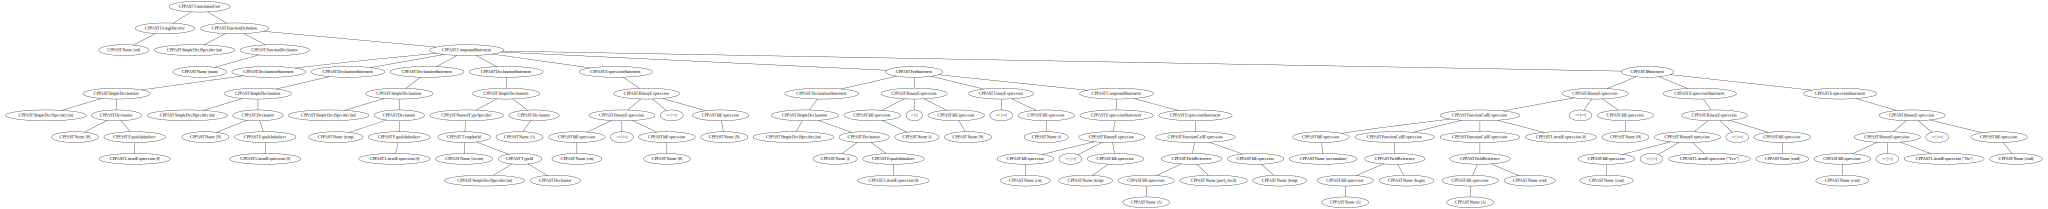

In [14]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp\p02784\s000008197.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [120]:
from vectorizer.AstNode2VecDataset import AstNode2VecDataset

dataset = AstNode2VecDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\astnode2vec_cpp", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp", 100)

In [121]:
dataset.create()

In [122]:
dataset.get_vocabulary_map()

{'++': 0,
 '+=': 1,
 '/': 2,
 '<': 3,
 '<<': 4,
 '>>': 5,
 'CPPASTBinaryExpression': 6,
 'CPPASTCastExpression': 7,
 'CPPASTCompoundStatement': 8,
 'CPPASTConstructorInitializer': 9,
 'CPPASTDeclarationStatement': 10,
 'CPPASTDeclarator': 11,
 'CPPASTEqualsInitializer': 12,
 'CPPASTExpressionStatement': 13,
 'CPPASTFieldReference': 14,
 'CPPASTForStatement': 15,
 'CPPASTFunctionCallExpression': 16,
 'CPPASTFunctionDeclarator': 17,
 'CPPASTFunctionDefinition': 18,
 'CPPASTIdExpression': 19,
 'CPPASTLiteralExpression': 20,
 'CPPASTName': 21,
 'CPPASTNamedTypeSpecifier': 22,
 'CPPASTSimpleDeclSpecifier': 23,
 'CPPASTSimpleDeclaration': 24,
 'CPPASTTemplateId': 25,
 'CPPASTTranslationUnit': 26,
 'CPPASTTypeId': 27,
 'CPPASTUnaryExpression': 28,
 'CPPASTUsingDirective': 29}

In [123]:
import pickle
file = 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\astnode2vec_cpp\\data\\s211935115_2.pkl'
with open(file, 'rb') as f:
    tree = pickle.load(f)
tree

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\astnode2vec_cpp\\data\\s211935115_2.pkl'

In [36]:
dataset.get_data_files()[21]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\astnode2vec_cpp\\data\\s179880363_117.pkl'

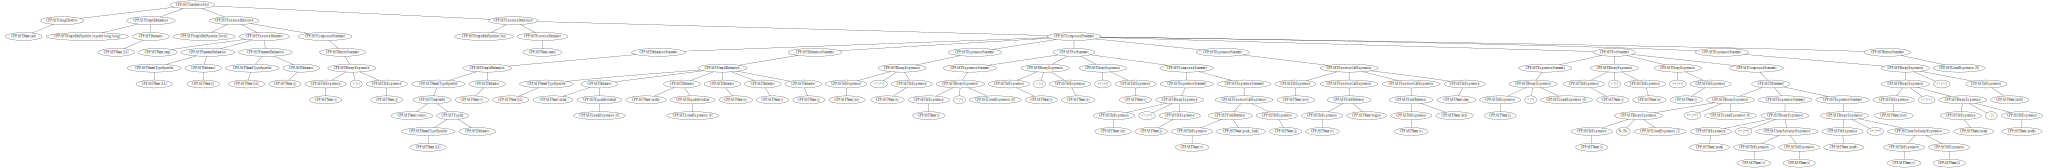

In [14]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp\p03434\s179880363.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [135]:
from vectorizer.AstNode2VecFileStreamDataGenerator import AstNode2VecFileStreamDataGenerator
train_files = dataset.get_data_files()
node_map = dataset.get_vocabulary_map()
training_generator = AstNode2VecFileStreamDataGenerator(train_files, node_map, batch_size=32, shuffle=True)

In [133]:
from vectorizer.AstNode2Vec import AstNode2Vec
from keras.metrics import Precision, Recall
import tensorflow as tf
model = AstNode2Vec(feature_size=len(node_map), embedding_size=60, vocab_size=len(node_map))
model.compile(loss=tf.keras.losses.CosineSimilarity(), optimizer='adam')

In [136]:
model.fit(training_generator, epochs=13)

Epoch 1/13


InvalidArgumentError:  In[0] mismatch In[1] shape: 60 vs. 120: [2,60] [120,60] 0 0
	 [[node ast_node2vec_11/Tensordot/MatMul (defined at c:\Users\sebas\Documents\Masterarbeit\tbcnn-tf2\vectorizer\AstNode2Vec.py:34) ]] [Op:__inference_train_function_2925370]

Function call stack:
train_function


In [90]:
import io
weights = model.get_layer('target_embedding').get_weights()[0]
vocab = dataset.get_vocabulary_map()
out_v = io.open('C:\\Users\\sebas\\Documents\\Masterarbeit\\vectors_new.tsv', 'w', encoding='utf-8')
out_m = io.open('C:\\Users\\sebas\\Documents\\Masterarbeit\\metadata_new.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()